# SF Home Prices
### Here is a practice notebook for looking at Redfin SF home prices and trying to get an idea of prices and sales
**Data**<br>
The data has been pulled from Redfin using their tabluar data and downladed as a .csv.  I'm pulling down data every month to look at the current market and compare it to the past three months of sales.  I also want to look at how much over asking (or under?) that a home goes for.<br><br>
I'm looking at a filter of the data less than 1.25M and at least 3br 2ba homes in and around San Francisco.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Data from Redfin 08/01/2021 with current listed prices and sold prices from the last 3 months
data0 = pd.read_csv('Data/redfin_2021-08-01-12-21-52.csv')

In [11]:
data0.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,2986 Bella Dr,Concord,CA,94519,729000,3,2.5,...,Active,August-1-2021 02:00 PM,August-1-2021 04:00 PM,http://www.redfin.com/CA/Concord/2986-Bella-Dr...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961231,N,Y,37.974726,-122.023066
1,MLS Listing,NaN,Single Family Residential,4747 Cunningham St,Oakland,CA,94619,849000,3,2.0,...,Active,August-1-2021 02:00 PM,August-1-2021 04:00 PM,http://www.redfin.com/CA/Oakland/4747-Cunningh...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961227,N,Y,37.786508,-122.182077
2,MLS Listing,NaN,Single Family Residential,14940 Riverdale St,San Leandro,CA,94578,799000,3,2.5,...,Active,August-1-2021 01:00 PM,August-1-2021 04:00 PM,http://www.redfin.com/CA/San-Leandro/14940-Riv...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960879,N,Y,37.693961,-122.135551
3,MLS Listing,NaN,Single Family Residential,5366 Leona St,Oakland,CA,94619,995000,4,3.0,...,Active,August-1-2021 02:00 PM,August-1-2021 04:00 PM,http://www.redfin.com/CA/Oakland/5366-Leona-St...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961188,N,Y,37.786440,-122.175204
4,MLS Listing,NaN,Single Family Residential,1833 Leo Ln,Concord,CA,94521,949000,4,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Concord/1833-Leo-Ln-9...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961152,N,Y,37.959092,-121.952399


In [4]:
# Double checking that there aren't any duplicates on the MLS#
data0['MLS#'].duplicated().sum()

0

In [5]:
# Data from Redfin 08/30/2021 with current listed prices and sold prices from the last 3 months
data1 = pd.read_csv('Data/redfin_2021-08-30-18-45-46.csv')

In [6]:
data1.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,879 Estuary St,Richmond,CA,94804,989000.0,3.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/CA/Richmond/879-Estuary-...,BAREIS,321080922,N,Y,37.919952,-122.354761
1,PAST SALE,July-30-2021,Single Family Residential,2316 Kristie Ln,South San Francisco,CA,94080,1250000.0,3.0,2.5,...,Sold,NaN,NaN,http://www.redfin.com/CA/South-San-Francisco/2...,San Francisco MLS,421564911,N,Y,37.645896,-122.456814
2,PAST SALE,August-27-2021,Single Family Residential,3620 Sunset Dr,SAN BRUNO,CA,94066,1250000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Bruno/3620-Sunset...,MLSListings,ML81853753,N,Y,37.632812,-122.471779
3,PAST SALE,August-27-2021,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1250000.0,4.0,2.5,...,Sold,NaN,NaN,http://www.redfin.com/CA/Alameda/8-Weiss-Ct-94...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076
4,MLS Listing,NaN,Single Family Residential,888 Ingerson Ave,SAN FRANCISCO,CA,94124,925000.0,5.0,3.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/888-Ing...,MLSListings,ML81858664,N,Y,37.718050,-122.390739


In [7]:
# Data from Redfin 09/04/2021 with current listed prices and sold prices from the last 3 months, expanding prices up to 1.5M b/c I was missing some sales
data2 = pd.read_csv('Data/redfin_2021-09-04-16-54-17.csv')

In [12]:
# Separate the data into for sale and past sale for each group.
MLS0=data0[data0['SALE TYPE']=='MLS Listing']
MLS1=data1[data1['SALE TYPE']=='MLS Listing']
MLS2=data2[data2['SALE TYPE']=='MLS Listing']

In [13]:
PAST0=data0[data0['SALE TYPE']=='PAST SALE']
PAST1=data1[data1['SALE TYPE']=='PAST SALE']
PAST2=data2[data2['SALE TYPE']=='PAST SALE']

In [58]:
df0=pd.concat([MLS0,MLS1,MLS2], join='outer', keys='MLS#')

In [59]:
df1=pd.concat([PAST0,PAST1,PAST2], join='outer', keys='MLS#')

In [60]:
df1=df1.rename(columns ={'PRICE':'SALE PRICE'})

In [61]:
keys=list(df0.keys())

In [62]:
keys.remove('PRICE')
keys.remove('SALE TYPE')
keys.remove('SOLD DATE')

In [77]:
df2=df0.merge(df1,on='MLS#', how='inner')
df2

,SALE TYPE_x,SOLD DATE_x,PROPERTY TYPE_x,ADDRESS_x,CITY_x,STATE OR PROVINCE_x,ZIP OR POSTAL CODE_x,PRICE,BEDS_x,BATHS_x,...,HOA/MONTH_y,STATUS_y,NEXT OPEN HOUSE START TIME_y,NEXT OPEN HOUSE END TIME_y,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)_y,SOURCE_y,FAVORITE_y,INTERESTED_y,LATITUDE_y,LONGITUDE_y
0,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,115.0,Sold,NaN,NaN,http://www.redfin.com/CA/Alameda/8-Weiss-Ct-94...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.780310,-122.273076
1,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,115.0,Sold,NaN,NaN,http://www.redfin.com/CA/Alameda/8-Weiss-Ct-94...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.780310,-122.273076
2,MLS Listing,NaN,Single Family Residential,3620 Sunset Dr,SAN BRUNO,CA,94066,1198000.0,3.0,2.0,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/San-Bruno/3620-Sunset...,MLSListings,N,Y,37.632812,-122.471779
3,MLS Listing,NaN,Single Family Residential,3620 Sunset Dr,SAN BRUNO,CA,94066,1198000.0,3.0,2.0,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/San-Bruno/3620-Sunset...,MLSListings,N,Y,37.632812,-122.471779
4,MLS Listing,NaN,Single Family Residential,882 Moultrie St,San Francisco,CA,94110,995000.0,3.0,2.0,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/882-Mou...,San Francisco MLS,N,Y,37.733463,-122.416530
5,MLS Listing,NaN,Single Family Residential,45 Penhurst Ave,DALY CITY,CA,94015,988000.0,3.0,2.0,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/Daly-City/45-Penhurst...,MLSListings,N,Y,37.661716,-122.473061
6,MLS Listing,NaN,Single Family Residential,339 Palomar Dr,Daly City,CA,94015,895000.0,3.0,2.0,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/Daly-City/339-Palomar...,San Francisco MLS,N,Y,37.675320,-122.484912


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 53 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   SALE TYPE_x                                                                                   7 non-null      object 
 1   SOLD DATE_x                                                                                   0 non-null      object 
 2   PROPERTY TYPE_x                                                                               7 non-null      object 
 3   ADDRESS_x                                                                                     7 non-null      object 
 4   CITY_x                                                                                        7 non-null      object 
 5   STATE OR PROVINCE_x              

In [81]:
# find out how much over asking the huses went for
df2['MARKUP']=df2['SALE PRICE']-df2['PRICE']
df2

,SALE TYPE_x,SOLD DATE_x,PROPERTY TYPE_x,ADDRESS_x,CITY_x,STATE OR PROVINCE_x,ZIP OR POSTAL CODE_x,PRICE,BEDS_x,BATHS_x,...,STATUS_y,NEXT OPEN HOUSE START TIME_y,NEXT OPEN HOUSE END TIME_y,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)_y,SOURCE_y,FAVORITE_y,INTERESTED_y,LATITUDE_y,LONGITUDE_y,MARKUP
0,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,Sold,NaN,NaN,http://www.redfin.com/CA/Alameda/8-Weiss-Ct-94...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.780310,-122.273076,51000.0
1,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,Sold,NaN,NaN,http://www.redfin.com/CA/Alameda/8-Weiss-Ct-94...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.780310,-122.273076,51000.0
2,MLS Listing,NaN,Single Family Residential,3620 Sunset Dr,SAN BRUNO,CA,94066,1198000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Bruno/3620-Sunset...,MLSListings,N,Y,37.632812,-122.471779,52000.0
3,MLS Listing,NaN,Single Family Residential,3620 Sunset Dr,SAN BRUNO,CA,94066,1198000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Bruno/3620-Sunset...,MLSListings,N,Y,37.632812,-122.471779,52000.0
4,MLS Listing,NaN,Single Family Residential,882 Moultrie St,San Francisco,CA,94110,995000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/882-Mou...,San Francisco MLS,N,Y,37.733463,-122.416530,235000.0
5,MLS Listing,NaN,Single Family Residential,45 Penhurst Ave,DALY CITY,CA,94015,988000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/Daly-City/45-Penhurst...,MLSListings,N,Y,37.661716,-122.473061,87000.0
6,MLS Listing,NaN,Single Family Residential,339 Palomar Dr,Daly City,CA,94015,895000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/Daly-City/339-Palomar...,San Francisco MLS,N,Y,37.675320,-122.484912,-20000.0


In [80]:
# Wait a minute.  I think this merge didn't go well. 
df2['MLS#'].duplicated().sum()
# Yep.  There are duplicates in the MLS# so it didn't merge correctly.  I shouldn't have this.

2

In [84]:
df2['MARKUP'].describe()

count         7.000000
mean      72571.428571
std       78462.001722
min      -20000.000000
25%       51000.000000
50%       52000.000000
75%       69500.000000
max      235000.000000
Name: MARKUP, dtype: float64

<AxesSubplot:ylabel='Frequency'>

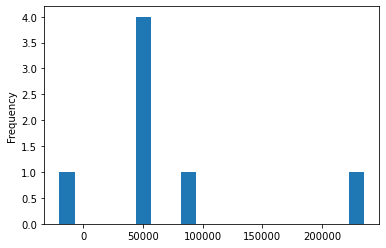

In [82]:
# The issue here is some data is the same in both... So I need only the data that changes from one to another. 
# I need to only look at asking vs sold not data vs data1 prices
df2['MARKUP'].plot.hist(bins=20)

<AxesSubplot:ylabel='Density'>

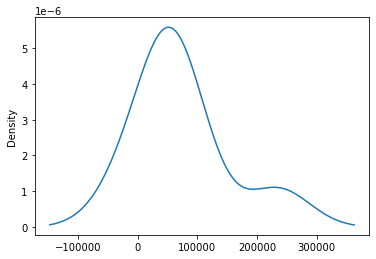

In [83]:
df2['MARKUP'].plot.kde()

In [1]:
# How to put together multiple .cvs files together
import glob
import pandas as pd

df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))

In [2]:
df.head

<bound method NDFrame.head of        SALE TYPE SOLD DATE              PROPERTY TYPE                 ADDRESS  \
0    MLS Listing       NaN  Single Family Residential           2986 Bella Dr   
1    MLS Listing       NaN  Single Family Residential      4747 Cunningham St   
2    MLS Listing       NaN  Single Family Residential      14940 Riverdale St   
3    MLS Listing       NaN  Single Family Residential           5366 Leona St   
4    MLS Listing       NaN  Single Family Residential             1833 Leo Ln   
..           ...       ...                        ...                     ...   
345  MLS Listing       NaN  Single Family Residential        451 Farallon Ave   
346  MLS Listing       NaN  Single Family Residential           2951 62Nd Ave   
347  MLS Listing       NaN  Single Family Residential  6501 Buena Ventura Ave   
348  MLS Listing       NaN  Single Family Residential           2608 19Th Ave   
349  MLS Listing       NaN  Single Family Residential   480 Santa Barbara Ave  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 349
Data columns (total 27 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   SALE TYPE                                                                                   1343 non-null   object 
 1   SOLD DATE                                                                                   239 non-null    object 
 2   PROPERTY TYPE                                                                               1343 non-null   object 
 3   ADDRESS                                                                                     1338 non-null   object 
 4   CITY                                                                                        1343 non-null   object 
 5   STATE OR PROVINCE                         

In [14]:
# Find the duplicated entries
df[df.duplicated('ADDRESS')].sort_values('ADDRESS')

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
240,MLS Listing,NaN,Single Family Residential,1014 10th St,OAKLAND,CA,94607,869000.0,4.0,2.0,...,Active,September-5-2021 02:00 PM,September-5-2021 04:00 PM,http://www.redfin.com/CA/Oakland/1014-10th-St-...,MLSListings,ML81857591,N,Y,37.806163,-122.284218
345,MLS Listing,NaN,Single Family Residential,1030 56th St,Oakland,CA,94608,1025000.0,3.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Oakland/1030-56th-St-...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40957434,N,Y,37.839688,-122.279367
161,MLS Listing,NaN,Single Family Residential,1122 Chestnut St,Oakland,CA,94607,849000.0,3.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Oakland/1122-Chestnut...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40964253,N,Y,37.807410,-122.285437
184,MLS Listing,NaN,Single Family Residential,1174 Goettingen St,San Francisco,CA,94134,988000.0,3.0,2.0,...,Active,September-5-2021 02:00 PM,September-5-2021 04:00 PM,http://www.redfin.com/CA/San-Francisco/1174-Go...,San Francisco MLS,421585982,N,Y,37.717528,-122.402891
156,MLS Listing,NaN,Single Family Residential,1234 54th St,Emeryville,CA,94608,799000.0,4.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Emeryville/1234-54th-...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40964342,N,Y,37.837390,-122.285658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,MLS Listing,NaN,Single Family Residential,9700 Macarthur Blvd,Oakland,CA,94605,499000.0,4.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Oakland/9700-MacArthu...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960253,N,Y,37.750659,-122.158972
75,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Daly-City/Undisclosed...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961148,N,Y,37.691509,-122.454321
108,MLS Listing,NaN,Single Family Residential,NaN,Oakland,CA,94605,679000.0,4.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/CA/Oakland/Undisclosed-a...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40965041,N,Y,37.763374,-122.173075
199,MLS Listing,NaN,Single Family Residential,NaN,San Leandro,CA,94578,775000.0,4.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Leandro/Undisclos...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40963482,N,Y,37.710660,-122.127166


In [16]:
# Separate out the listed prices and sold prices
df_listing=df[df['SALE TYPE']=='MLS Listing']
df_sold=df[df['SALE TYPE']=='PAST SALE']

In [17]:
# changing sold prices column name from price to sale price
df_sold=df_sold.rename(columns ={'PRICE':'SALE PRICE'})

In [21]:
df2=df_listing.merge(df_sold,on='MLS#', how='outer')

In [23]:
df2

,SALE TYPE_x,SOLD DATE_x,PROPERTY TYPE_x,ADDRESS_x,CITY_x,STATE OR PROVINCE_x,ZIP OR POSTAL CODE_x,PRICE,BEDS_x,BATHS_x,...,HOA/MONTH_y,STATUS_y,NEXT OPEN HOUSE START TIME_y,NEXT OPEN HOUSE END TIME_y,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)_y,SOURCE_y,FAVORITE_y,INTERESTED_y,LATITUDE_y,LONGITUDE_y
0,MLS Listing,NaN,Single Family Residential,2986 Bella Dr,Concord,CA,94519,729000.0,3.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLS Listing,NaN,Single Family Residential,4747 Cunningham St,Oakland,CA,94619,849000.0,3.0,2.0,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/Oakland/4747-Cunningh...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.786508,-122.182077
2,MLS Listing,NaN,Single Family Residential,14940 Riverdale St,San Leandro,CA,94578,799000.0,3.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MLS Listing,NaN,Single Family Residential,5366 Leona St,Oakland,CA,94619,995000.0,4.0,3.0,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/Oakland/5366-Leona-St...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.786440,-122.175204
4,MLS Listing,NaN,Single Family Residential,1833 Leo Ln,Concord,CA,94521,949000.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/San-Bruno/1480-Sequoi...,MLSListings,N,Y,37.627449,-122.444357
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/Kensington/364-Covent...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.900479,-122.285968
1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/Oakland/3990-Fruitval...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.806494,-122.210897
1329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sold,NaN,NaN,http://www.redfin.com/CA/Oakland/7221-Skyline-...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.842838,-122.197153
